
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Paso 4. Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

project_sql_result_01.csv. Contiene los siguientes datos:

company_name: nombre de la empresa de taxis
trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.
project_sql_result_04.csv. Contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes
average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
Para estos dos datasets ahora necesitas:

importar los archivos
estudiar los datos que contienen
asegurarte de que los tipos de datos sean correctos
identificar los 10 principales barrios en términos de finalización
hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
sacar conclusiones basadas en cada gráfico y explicar los resultados

In [1]:
import pandas as pd


# Cargar los archivos CSV
data_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
data_04 = pd.read_csv('/datasets/project_sql_result_04.csv')

 
data_07 = pd.read_csv('/datasets/project_sql_result_07.csv') #CODIGO ADICIONAL PARA LA CORRECCION

# Inspeccionar los primeros registros para entender la estructura de los datos
print(data_01.head())
print(data_04.head())

print(data_07.head()) #CODIGO ADICIONAL PARA LA CORRECCION

# Verificar los tipos de datos
print(data_01.info())
print(data_04.info())
print(data_07.info()) #CODIGO ADICIONAL PARA LA CORRECCION








                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Colum

In [2]:

# Convertir datos si es necesario, por ejemplo, asegurarse de que los números sean tipo int o float
data_01['trips_amount'] = data_01['trips_amount'].astype(int)
data_04['average_trips'] = data_04['average_trips'].astype(float)

data_01



,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [3]:

data_04

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [4]:

# Verificación de registros duplicados en cada dataset
duplicates_01 = data_01.duplicated().sum() #CODIGO ADICIONAL PARA LA CORRECCION
duplicates_04 = data_04.duplicated().sum() #CODIGO ADICIONAL PARA LA CORRECCION
duplicates_07 = data_07.duplicated().sum() #CODIGO ADICIONAL PARA LA CORRECCION

print(duplicates_01)
print(duplicates_04)
print(duplicates_07)

0
0
197


In [5]:
# Identificar los 10 principales barrios en términos de finalización del recorrido
top_10_neighborhoods = data_04.sort_values(by='average_trips', ascending=False).head(10)

top_10_neighborhoods.round(2)

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

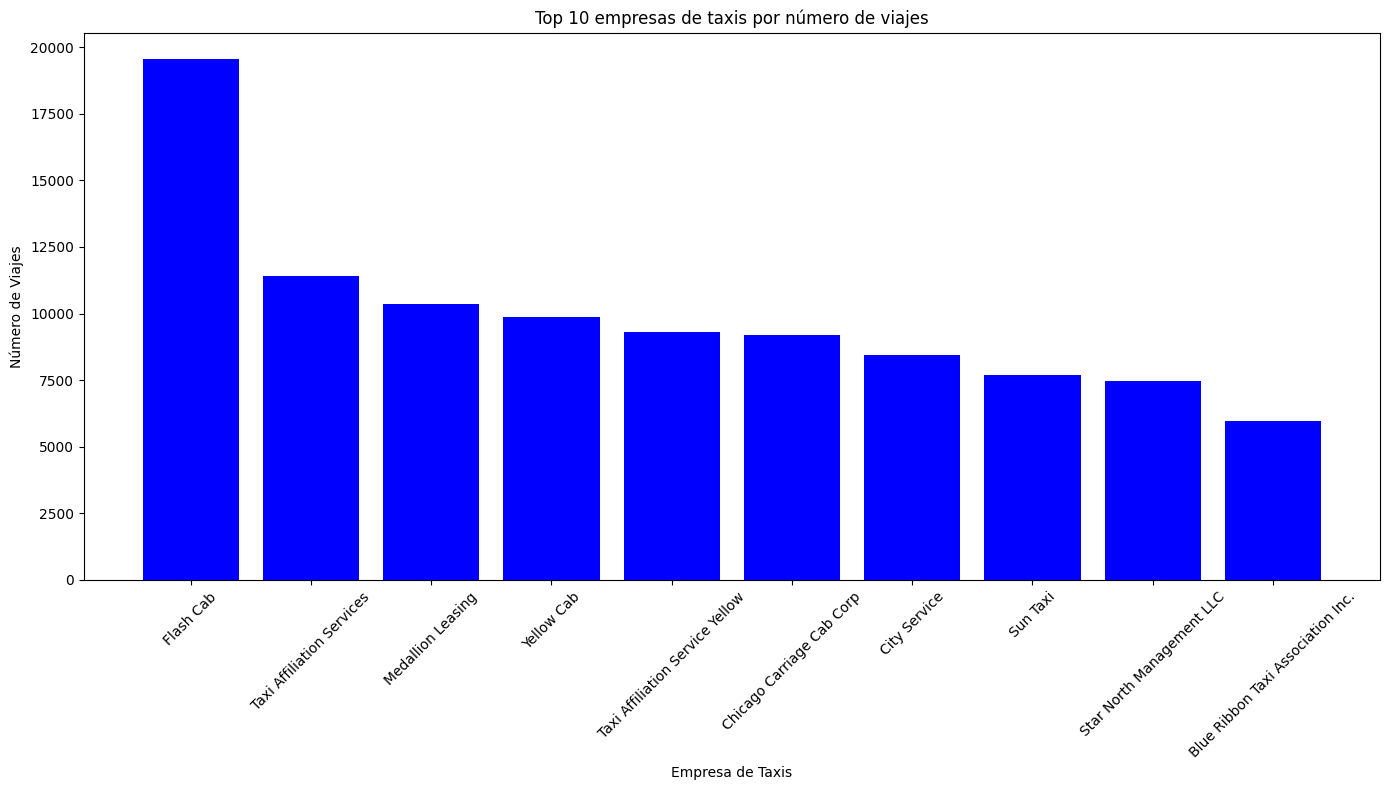

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# datos por 'trips_amount' en orden descendente y seleccionar el top 10
top_10_companies = data_01.sort_values(by='trips_amount', ascending=False).head(10)

plt.figure(figsize=(14, 8))  # Ajustar el tamaño para mejor visualización
plt.bar(top_10_companies['company_name'], top_10_companies['trips_amount'], color='blue')
plt.title('Top 10 empresas de taxis por número de viajes')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)  #Rotar las etiquetas para mejorar la visualización
plt.tight_layout()
plt.show()


<div style="border: 2px solid #007BFF; background-color: #E3F2FD; padding: 10px; border-radius: 5px;">
    <strong style="color: #007BFF;">La grafica muestra las 10  principales compañias de taxi que tienen 
    un mayor numero de viajes , la diferencia con flash cab comparada a todas las demas es casi el doble y
    las demas empresas , realizan viajes muy similares</strong>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de la gráfica para visualizar los resultados. Solamente dado que al cliente le interesa el top 10 de las principales empresas con número de viajes, te recomiendo complementar este análisis con una gráfica solamente mostrando el top 10.</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

start_ts: fecha y hora de la recogida
weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
duration_seconds: duración del viaje en segundos
Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

Levene statistic: 0.38853489683656073, P-value: 0.5332038671974493
T-statistic: -6.946177714041499
P-value: 6.517970327099473e-12


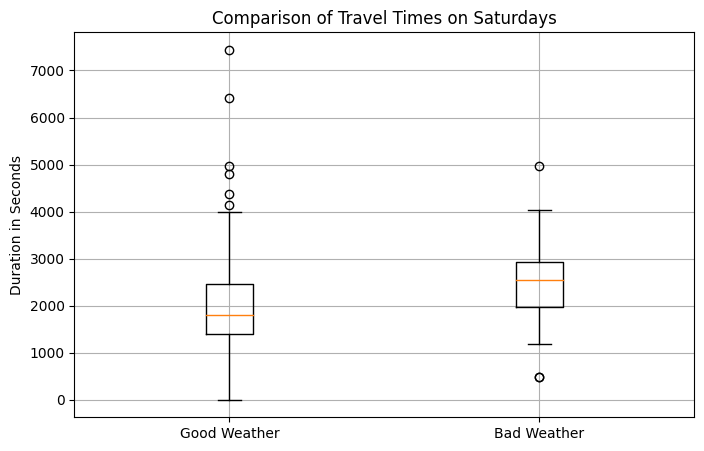

In [7]:
import pandas as pd
from scipy.stats import ttest_ind, levene
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('/datasets/project_sql_result_07.csv', parse_dates=['start_ts'])

# Filtrar por sábados
data['day_of_week'] = data['start_ts'].dt.day_name()
saturdays = data[data['day_of_week'] == 'Saturday']

# Separar en buen tiempo y mal tiempo
good_weather = saturdays[saturdays['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = saturdays[saturdays['weather_conditions'] == 'Bad']['duration_seconds']

# Prueba de Levene para igualdad de varianzas
levene_stat, levene_p = levene(good_weather.dropna(), bad_weather.dropna())
print(f"Levene statistic: {levene_stat}, P-value: {levene_p}")

# Usar el resultado de Levene para decidir si las varianzas son iguales
equal_var = levene_p > 0.05

# Verificación estadística con t-test
t_stat, p_value = ttest_ind(good_weather.dropna(), bad_weather.dropna(), equal_var=equal_var)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Crear el gráfico
plt.figure(figsize=(8, 5))
plt.boxplot([good_weather.dropna(), bad_weather.dropna()], labels=['Good Weather', 'Bad Weather'])
plt.title('Comparison of Travel Times on Saturdays')
plt.ylabel('Duration in Seconds')
plt.grid(True)
plt.show()


###Conclusión

Prueba de Levene:
La estadística de Levene resultó en un valor de 0.3885 y un p-valor de 0.5332. Dado que el p-valor es mayor que 0.05, no rechazamos la hipótesis nula de igualdad de varianzas entre los dos grupos de datos (viajes en buen tiempo y mal tiempo los sábados).

Prueba T de Student:
La prueba t-test resultó en una estadística T de -6.946 y un p-valor extremadamente bajo (aproximadamente 6.52e-12), lo que es mucho menor que el nivel de significancia estándar de 0.05. Este resultado permite rechazar la hipótesis nula de que no hay diferencia muy significativa en los tiempos de viaje entre los días de buen y mal tiempo.

T-Test
Los resultados de la prueba t-test indican que hay una diferencia significativa en los tiempos de viaje entre los días lluviosos y no lluviosos para los viajes realizados los sábados desde el Loop hasta el Aeropuerto Internacional O'Hare. El valor negativo de la estadística T dicews que los tiempos de viaje tienden a ser más largos en días lluviosos en comparación con los días de buen tiempop. Este hallazgo es estadísticamente significativo, lo que nos dice que la lluvia tiene un impacto notable en la duración de los viajes.

Implicaciones:
Este análisis proporciona evidencia sólida de que las condiciones meteorológicas adversas, como la lluvia, pueden afectar negativamente la duración de los viajes. Los viajeros y las empresas de transporte podrían utilizar esta información para planificar mejor en días de mal tiempo, posiblemente para acomodar retrasos anticipados debido a la lluvia.

Estos resultados también podrían ser útiles para las autoridades de planificación urbana y gestión del tráfico para mejorar las estrategias de manejo de tráfico y infraestructura durante condiciones climáticas adversas, asegurando así una movilidad más eficiente y segura en la ciudad.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:


* Realizar un análisis de duplicados
    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
*  Profundizar en los resultados intermedios y en la conclusión final.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>